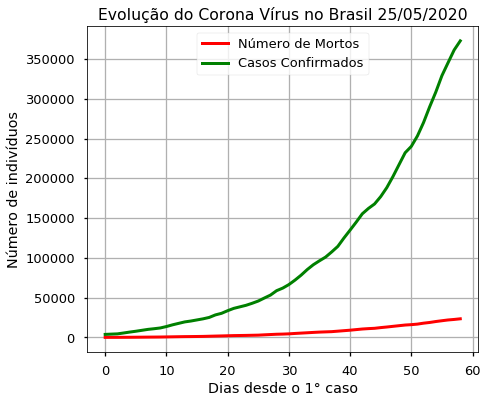

In [21]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

dados = pd.read_csv("COVIDBR_25mai2020.csv")
dados['taxa/100k'] = '' #inserindo coluna taxa/100kH
dados['taxa/100k']=(dados['obitosAcumulado']/dados['populacaoTCU2019'])*100000 #calculando taxa/100kH
 
dados = dados.loc[dados['codmun'].isna()==False] #tirando soma total
dados = dados.loc[dados['municipio'].isna()==False] #tirando soma total

municipios = dados.groupby('semanaEpi').agg({'casosAcumulado':'sum','obitosAcumulado':'sum'}).reset_index()

estados = dados.groupby(['estado','data']).agg({'casosAcumulado':'sum','obitosAcumulado':'sum','populacaoTCU2019':'sum'}).reset_index()
estados['taxa/100k']=(estados['obitosAcumulado']/estados['populacaoTCU2019'])*100000 #calculo da taxa para os estados
estados = dados.groupby('data').agg({'casosAcumulado':'sum','obitosAcumulado':'sum'}).reset_index()

plt.style.use('seaborn-talk')

lista_mortos = estados['obitosAcumulado']
y_casos_confirmados = estados['casosAcumulado']
y_mortos = lista_mortos
y_casos_confirmados
x = [i for i in range(0, len(lista_mortos))]

plt.figure(figsize=(7,6))
plt.plot(x, y_mortos, color='red', label='Número de Mortos', linewidth=3.0)
plt.plot(x, y_casos_confirmados, color='green', label='Casos Confirmados', linewidth=3.0)

plt.xlabel('Dias desde o 1° caso')
plt.ylabel('Número de indivíduos')
plt.title('Evolução do Corona Vírus no Brasil 25/05/2020')
plt.grid(True)
plt.legend(loc='upper center')
plt.savefig('corona.png')

plt.show()
# # # estados = estados.loc[estados['regiao']=='Sudeste']

# # fig, ax = plt.subplots(figsize=(7, 5))
# # ax.barh(estados['estado'], estados['obitosAcumulado'])
# # plt.xlabel('Número de mortos')
# # plt.ylabel('Estados')



In [53]:
dados = pd.read_csv("COVIDBR_25mai2020.csv")
dados = dados.loc[dados['data']=='2020-05-25']

dadosRegiao = dados.loc[dados['regiao'].isna()==False]

dadosRegiao = dados.loc[dados['regiao']=='Brasil']

# dadosRegiao = dados.loc[dados['municipio'].isna()==False]

dadosPorEstado = dadosRegiao.groupby('regiao').agg({'obitosAcumulado':'sum'}).reset_index()
dadosPorEstado

,regiao,obitosAcumulado
0,Brasil,23473


In [93]:
dados = pd.read_csv("covid19.csv")
dados = dados.loc[dados['place_type']=="city"]

dados = dados.groupby(['state','date','estimated_population_2019','order_for_place']).agg({'new_deaths':'sum','new_confirmed':'sum'})
dados = dados.rename(columns={'order_for_place':'dias_1_caso'}).reset_index()
dados = dados.rename(columns={'order_for_place':'dias_desde_1_caso'})
dados

# plt.stackplot(dados['date'],dados['new_deaths'], color='b')
# 

,state,date,estimated_population_2019,dias_desde_1_caso,new_deaths,new_confirmed
0,AC,2020-03-17,407319.0,1,0,3
1,AC,2020-03-18,407319.0,2,0,0
2,AC,2020-03-19,407319.0,3,0,1
3,AC,2020-03-20,407319.0,4,0,3
4,AC,2020-03-21,407319.0,5,0,4
...,...,...,...,...,...,...
117380,TO,2020-05-25,51252.0,45,-3,-61
117381,TO,2020-05-25,53010.0,28,-1,-14
117382,TO,2020-05-25,86647.0,48,0,-46
117383,TO,2020-05-25,180470.0,60,-12,-1081
